In [3]:
import numpy as np
import pandas as pd 
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as colors
import re


#  merge the 12 months of sales data into single csv file

In [9]:

# Specify the directory containing the sales data
data_dir = "C:\\Users\\Admin\\Desktop\\Sales_Data"

# Get a list of all files in the directory
files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]

# Create an empty DataFrame to hold all the data
all_months_data = pd.DataFrame()

# Loop through each file and append the data to the DataFrame
for file in files:
    df = pd.read_csv(os.path.join(data_dir, file))
    all_months_data = pd.concat([all_months_data, df])

# Save the concatenated DataFrame to a new CSV file
all_months_data.to_csv("all_data.csv", index=False)

print("All data combined and saved to 'all_data.csv'")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Admin\\Desktop\\Sales_Data'

In [11]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how ='any')

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [17]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [186]:
# Step 1: Check and remove invalid rows in 'Order Date'
# Filter rows where the first two characters of 'Order Date' are not digits
all_data = all_data[all_data['Order Date'].str[0:2].str.isdigit()]

# Step 2: Extract the month and convert to integer
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')

# Optional: Verify the changes
print(all_data.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  


In [188]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [190]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [192]:
# def get_city(address):
#     return address.split(',')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [195]:
all_data['Sales_Amount'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales_Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99


# what was the best month for sales? and how much was earned that month?

In [198]:
Sales_by_months=all_data.groupby('Month').sum()['Sales_Amount']

In [200]:
Sales_by_months

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales_Amount, dtype: float64

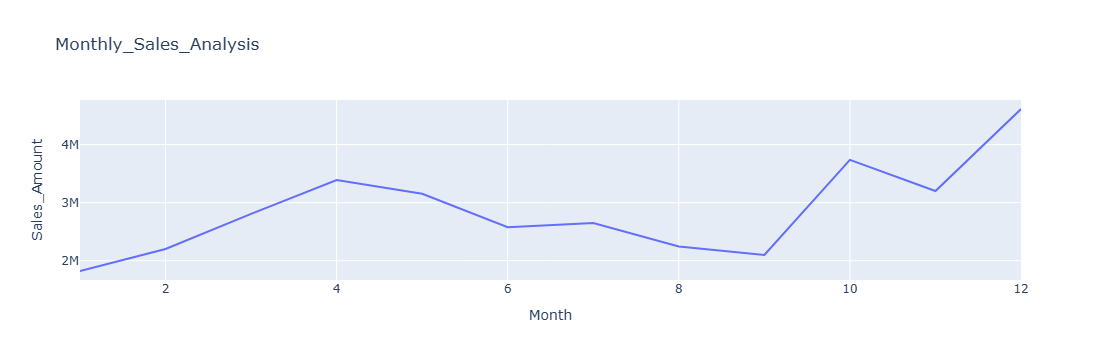

In [202]:
fig_month = px.line(Sales_by_months , y = 'Sales_Amount' , title = 'Monthly_Sales_Analysis')
fig_month.show()

# what city had a the highest number of sales

In [205]:
Sales_result = all_data.groupby('City').sum()
Sales_result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales_Amount
City,,,,,,,,
Atlanta,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,14053,2307747.47,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",87765,2320490.61
San Francisco,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91
Seattle,1765631765681765881766121766241766541766631766...,Bose SoundSport HeadphonesLightning Charging C...,16553,2733296.01,04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",104941,2747755.48


In [207]:
sales_by_city = all_data.groupby('City').sum()['Sales_Amount']
sales_by_city


City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales_Amount, dtype: float64

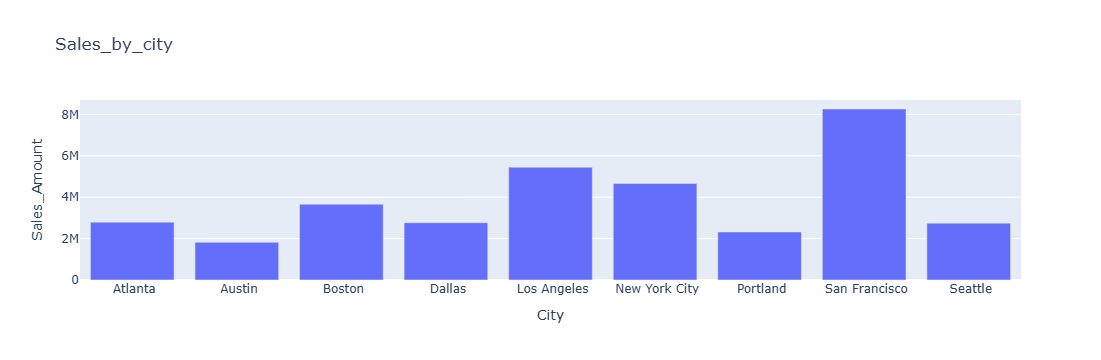

In [209]:
 fig_city = px.bar(sales_by_city, y = 'Sales_Amount' , title = 'Sales_by_city')
 fig_city.show()


# what time should we display adverthsments to maximize likelihood of customer's buying product?


In [260]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales_Amount,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,08:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,09:27


In [268]:
all_data['Time'] = all_data['Order Date'].str.split(' ').str[1]
all_data.head()

AttributeError: Can only use .str accessor with string values!

In [270]:
grouped = all_data.groupby(['Product', 'Time'])['Quantity Ordered'].mean().unstack()


In [224]:
grouped

Time,00:00,00:01,00:02,00:03,00:04,00:05,00:06,00:07,00:08,00:09,...,23:50,23:51,23:52,23:53,23:54,23:55,23:56,23:57,23:58,23:59
Product,,,,,,,,,,,,,,,,,,,,,
20in Monitor,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
27in 4K Gaming Monitor,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
27in FHD Monitor,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
34in Ultrawide Monitor,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AA Batteries (4-pack),1.333333,1.333333,1.000000,1.125000,1.125000,1.285714,1.090909,1.750000,2.250000,1.222222,...,1.250000,1.900000,1.266667,1.333333,1.333333,1.500000,1.000000,1.375000,1.700000,1.166667
AAA Batteries (4-pack),1.625000,1.500000,1.600000,2.166667,1.714286,1.833333,1.500000,1.785714,1.600000,1.588235,...,1.300000,1.500000,1.352941,1.600000,1.555556,2.000000,1.400000,1.333333,1.636364,1.769231
Apple Airpods Headphones,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Bose SoundSport Headphones,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.166667,1.000000,1.000000,...,1.111111,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000
Flatscreen TV,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,NaN,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



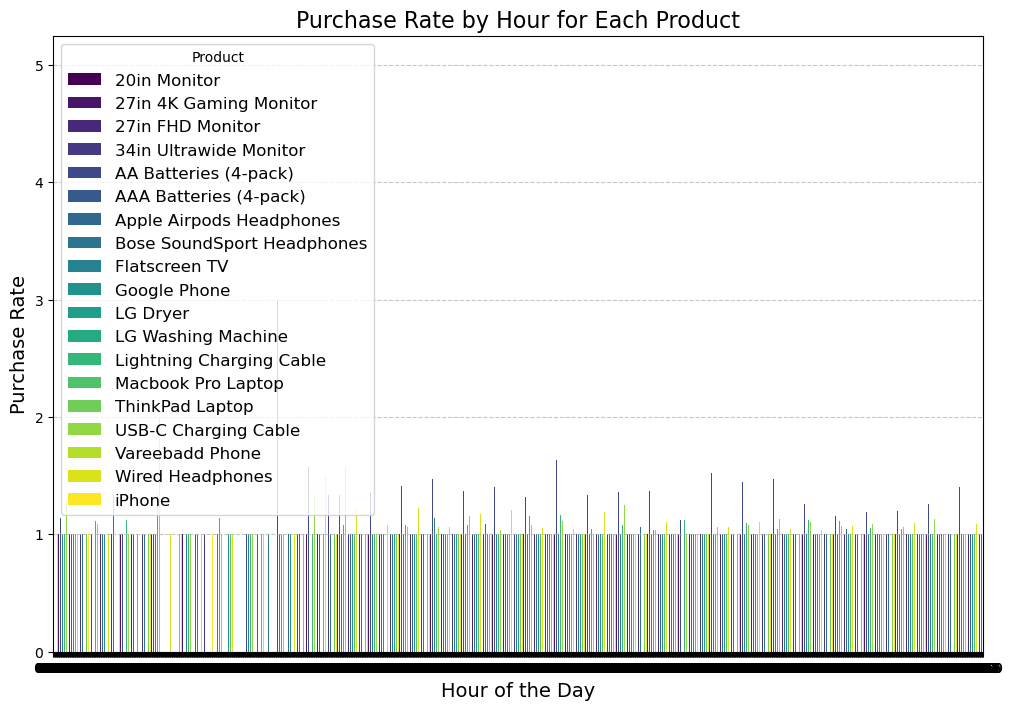

In [229]:

plt.figure(figsize=(12, 8))
grouped.T.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Purchase Rate by Hour for Each Product", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Purchase Rate", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Product", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


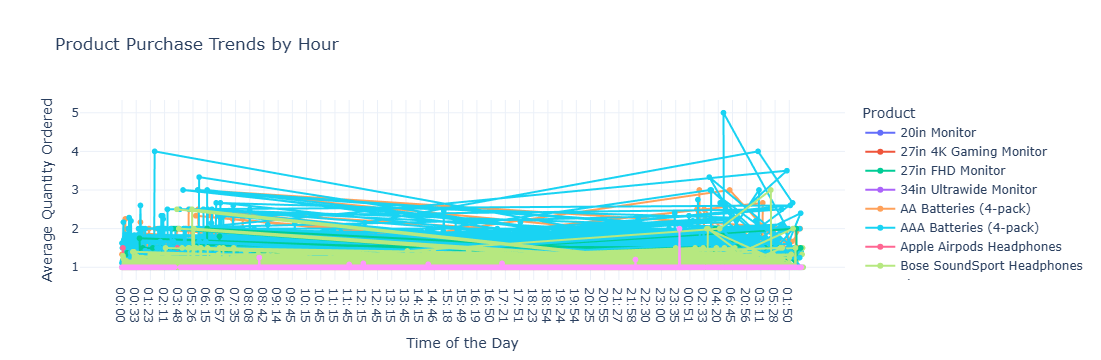

In [244]:

grouped = all_data.groupby(['Product', 'Time'])['Quantity Ordered'].mean().reset_index()


# Create a line graph using Plotly Express
fig = px.line(
    grouped,
    x='Time',                # x-axis is time
    y='Quantity Ordered',    # y-axis is the average quantity ordered
    color='Product',         # Separate lines for each product
    markers=True,            # Add markers for better visualization
    title='Product Purchase Trends by Hour',
    labels={
        'Time': 'Time of the Day',
        'Quantity Ordered': 'Average Quantity Ordered',
        'Product': 'Product'
    }
)

# Customize layout
fig.update_layout(
    xaxis=dict(
        tickformat="%H:%M",   # Format x-axis ticks to show time in HH:MM format
        title="Time of the Day"
    ),
    yaxis=dict(title='Average Quantity Ordered'),
    legend_title="Product",
    template="plotly_white"  # Optional: Choose a clean white template
)

# Show the plot
fig.show()


# what products are most often sold together?


In [277]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales_Amount,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,08:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,09:27


In [7]:
Product_result = all_data.groupby('Product').count()
Product_result

NameError: name 'all_data' is not defined

In [5]:
fig_products = px.bar(Product_result, y = 'Sales_Amount' , title = 'Product_result')
fig_products.show()


NameError: name 'Product_result' is not defined